In [1]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

from data_loaders import Plain_Dataset, eval_data_dataloader
from deep_emotion import Deep_Emotion
from generate_data import Generate_data


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
import cv2
import os
import math
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
data_path = 'jaffe_raw/'
save_path = 'jaffe_new/'

In [3]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    total_train_loss = []
    total_val_loss = []
    total_train_acc = []
    total_val_acc = []
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            loss = criterion(outputs,labels)
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        print(val_correct.double())    
        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))
        total_train_loss.append(train_loss)
        total_val_loss.append(validation_loss)
        total_train_acc.append(train_acc)
        total_val_acc.append(val_acc)
    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")
    return total_train_loss,total_val_loss,total_train_acc,total_val_acc

test model

In [4]:
net = Deep_Emotion()
a = torch.rand(1,1,48,48)

In [5]:

#  [B, C, H, W] 
out = net(a)

In [6]:
out.shape

torch.Size([1, 7])

1. data preprocess 
    框脸，resize，
2. split dataset
3. dataloader 测试

# jaffe

### 找到脸 然后 resize

In [7]:
def preprocessing(raw_path,save_path):
    img_list = os.listdir(data_path)
    for img in img_list:
        input_img = cv2.imread(raw_path+img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(input_img, 1.3, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(input_img, (x,y), (x+w,y+h), (0,0,0), 2)     
            face_roi=input_img[y:y+h,x:x+w]
            face_roi = cv2.resize(face_roi,(48,48))
        cv2.imwrite(save_path+img,face_roi)
preprocessing(data_path,save_path)

NameError: name 'face_detector' is not defined

### test code

In [14]:
img_list = os.listdir(data_path)
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [15]:
img = img_list[3]

In [16]:
input_img = cv2.imread(data_path+img)
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
faces = face_detector.detectMultiScale(input_img, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(input_img, (x,y), (x+w,y+h), (0,0,0), 2)     
    face_roi=input_img[y:y+h,x:x+w]
    face_roi = cv2.resize(face_roi,(48,48))
cv2.imwrite(save_path+img,face_roi)

True

In [18]:
face_roi.shape

(48, 48)

In [20]:
input_img.shape

(256, 256)

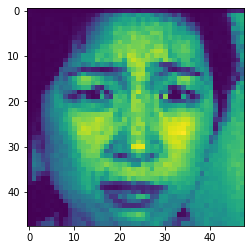

In [24]:
plt.imshow(face_roi)
plt.show()

In [27]:
len(img_list)

213

## train 
use 120 images for training
23 images for validation
70 images for test (10 images per emotion in the test set). 

In [5]:
np.random.seed(100)

In [6]:
with open('jaffe.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    rows = [row for row in reader]

In [7]:
len(rows)
random_array = np.arange(len(rows))

rows

In [8]:
c = rows[0][1]

In [9]:
c

'0'

In [10]:
cnt_an = 0
cnt_di = 0
cnt_fe = 0
cnt_ha = 0
cnt_sa = 0
cnt_su = 0
cnt_ne = 0
loop = True

cnt = 0

st = []
st_lbl = []
idx = []
while loop:
    temp = np.random.choice(random_array)
    item = rows[temp][0]
    lbl = int(rows[temp][1])
    if item not in st:
        
        if lbl == 0 and cnt_an<10 :
            cnt_an = cnt_an+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==1 and cnt_di<10:
            cnt_di = cnt_di+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==2 and cnt_fe<10:
            cnt_fe = cnt_fe+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==3 and cnt_ha<10:
            cnt_ha = cnt_ha +1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl == 4 and cnt_sa<10:
            cnt_sa = cnt_sa +1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==5 and cnt_su<10:
            cnt_su = cnt_su+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)
        elif lbl==6 and cnt_ne<10:
            cnt_ne = cnt_ne+1
            st_lbl.append(lbl)
            st.append(item)
            idx.append(temp)

#         print(len(st))
        if cnt_an==10 and cnt_di==10 and cnt_fe==10 and cnt_ha==10 and cnt_sa==10 and cnt_su==10 and cnt_ne==10:
            break
        
    
    


## 生成 test.csv

In [11]:
with open('test_jaffe.csv', 'w', encoding='UTF8',newline='') as test_jaffe:
    test_writer = csv.writer(test_jaffe)
    for i in range(len(rows)):
        if i in idx:
            test_writer.writerow(rows[i])

## 生成 vali.csv

In [12]:
idx_val = []
cnt_val = 0
while True:
    temp = np.random.choice(random_array)
    if temp not in idx:
        cnt_val = cnt_val+1
        idx_val.append(temp)
        
        if cnt_val>=23:
            break

In [13]:
with open('vali_jaffe.csv', 'w', encoding='UTF8',newline='') as vali_jaffe:
    vali_writer = csv.writer(vali_jaffe)
    for i in range(len(rows)):
        if i in idx_val:
            vali_writer.writerow(rows[i])

## 生成 train.csv

In [14]:
with open('train_jaffe.csv', 'w', encoding='UTF8',newline='') as train_jaffe:
    train_writer = csv.writer(train_jaffe)
    for i in range(len(rows)):
        if i not in idx and i not in idx_val:
            train_writer.writerow(rows[i])

# dataset and dataloader

In [4]:
class Jaffe_Dataset(Dataset):
    def __init__(self,csv_file,img_dir,datatype,transform):
        '''
        Pytorch Dataset class
        params:-
                 csv_file : the path of the csv file    (train, validation, test)
                 img_dir  : the directory of the images (train, validation, test)
                 datatype : string for searching along the image_dir (train, val, test)
                 transform: pytorch transformation over the data
        return :-
                 image, labels
                '''
        with open(csv_file,'r') as csvfile:
            rd = csv.reader(csvfile)
            self.data = [row for row in rd]

        self.img_dir = img_dir
        self.transform = transform
        self.datatype = datatype

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
#         img = Image.open(self.img_dir+self.data[idx][0])

        img = cv2.imread(self.img_dir+self.data[idx][0],0)
#         print(img.shape)
        lables = np.array(int(self.data[idx][1]))
        lables = torch.from_numpy(lables).long()

        if self.transform :
            img = self.transform(img)
        return img,lables


In [5]:
def weight_init(m):  #初始化权重
    if isinstance(m, nn.Conv2d):
        m.weight.data.normal_(mean = 0, std = 0.05)
        m.bias.data.zero_()
    elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.normal_(mean = 0, std = 0.05)
        m.bias.data.zero_()
    elif isinstance(m, nn.Linear):
        m.weight.data.normal_(mean = 0, std = 0.05)
        m.bias.data.zero_()


In [6]:
# traincsv_file = 'train_jaffe.csv'
traincsv_file = 'train_vali_jaffe.csv'
validationcsv_file = 'vali_jaffe.csv'
train_img_dir = 'jaffe_new/'
validation_img_dir = 'jaffe_new/'

In [7]:
batchsize = 128
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
# transformation= transforms.Compose([transforms.ToTensor()])
train_dataset= Jaffe_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)
validation_dataset= Jaffe_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [8]:
epochs = 55
lr = 0.005

net = Deep_Emotion()
net.to(device)
# net.apply(weight_init)
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= lr)


In [9]:
train_loss, val_loss,train_acc,val_acc = Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================


D:\Anacon_Install\lib\site-packages\torch\nn\functional.py:4277: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
D:\Anacon_Install\lib\site-packages\torch\nn\functional.py:4215: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


tensor(4., dtype=torch.float64)
Epoch: 1 	Training Loss: 0.02992382 	Validation Loss 0.09251815 	Training Acuuarcy 13.287% 	Validation Acuuarcy 19.048%
tensor(2., dtype=torch.float64)
Epoch: 2 	Training Loss: 0.02785363 	Validation Loss 0.09272057 	Training Acuuarcy 18.182% 	Validation Acuuarcy 9.524%
tensor(2., dtype=torch.float64)
Epoch: 3 	Training Loss: 0.02748070 	Validation Loss 0.09261929 	Training Acuuarcy 23.077% 	Validation Acuuarcy 9.524%
tensor(3., dtype=torch.float64)
Epoch: 4 	Training Loss: 0.02545682 	Validation Loss 0.09252723 	Training Acuuarcy 18.881% 	Validation Acuuarcy 14.286%
tensor(3., dtype=torch.float64)
Epoch: 5 	Training Loss: 0.02700753 	Validation Loss 0.09247633 	Training Acuuarcy 20.979% 	Validation Acuuarcy 14.286%
tensor(3., dtype=torch.float64)
Epoch: 6 	Training Loss: 0.02512587 	Validation Loss 0.09230248 	Training Acuuarcy 30.070% 	Validation Acuuarcy 14.286%
tensor(2., dtype=torch.float64)
Epoch: 7 	Training Loss: 0.02485085 	Validation Loss 0.092

tensor(19., dtype=torch.float64)
Epoch: 55 	Training Loss: 0.00454722 	Validation Loss 0.02117399 	Training Acuuarcy 89.510% 	Validation Acuuarcy 90.476%
===================================Training Finished===================================


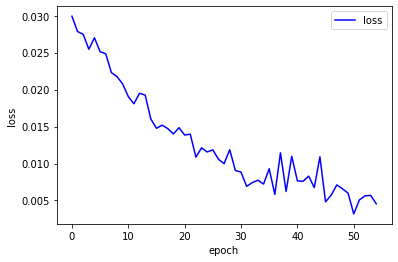

In [10]:
import matplotlib.pyplot as plt
# plt.switch_backend('Agg') # 后端设置'Agg' 参考：https://cloud.tencent.com/developer/article/1559466

plt.figure()                   # 设置图片信息 例如：plt.figure(num = 2,figsize=(640,480))
plt.plot(train_loss,'b',label = 'loss')        # epoch_losses 传入模型训练中的 loss[]列表,在训练过程中，先创建loss列表，将每一个epoch的loss 加进这个列表
# plt.plot(val_loss,'g',label = 'loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()        #个性化图例（颜色、形状等）

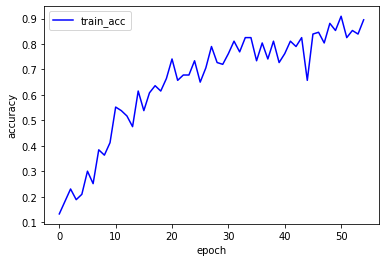

In [11]:
plt.figure()                   # 设置图片信息 例如：plt.figure(num = 2,figsize=(640,480))
plt.plot(train_acc,'b',label = 'train_acc')        # epoch_losses 传入模型训练中的 loss[]列表,在训练过程中，先创建loss列表，将每一个epoch的loss 加进这个列表
# plt.plot(val_acc,'g',label = 'val_acc') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()        #个性化图例（颜色、形状等）

## test

In [12]:
testcsv_file = 'test_jaffe.csv'
test_img_dir = 'jaffe_new/'
test_dataset= Jaffe_Dataset(csv_file=testcsv_file, img_dir = test_img_dir, datatype = 'test', transform = transformation)
test_loader= DataLoader(test_dataset,batch_size=70,shuffle = True,num_workers=0)

total = []
net.eval()
with torch.no_grad():
    for data,labels in test_loader:
        output = net(data)
        pred = F.softmax(output,dim=1)
        result = torch.argmax(pred,1)
        wrong = torch.where(result != labels,torch.tensor([1.]),torch.tensor([0.])) 
        acc = 1-(torch.sum(wrong)/70)
        total.append(acc.item())

    print('Accuracy of the network on the test images: %d %%' % (100 * np.mean(total)))

Accuracy of the network on the test images: 55 %


test code

In [13]:
parm={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    parm[name]=parameters.detach().numpy()

conv1.weight : torch.Size([10, 1, 3, 3])
conv1.bias : torch.Size([10])
conv2.weight : torch.Size([10, 10, 3, 3])
conv2.bias : torch.Size([10])
conv3.weight : torch.Size([10, 10, 3, 3])
conv3.bias : torch.Size([10])
conv4.weight : torch.Size([10, 10, 3, 3])
conv4.bias : torch.Size([10])
norm.weight : torch.Size([10])
norm.bias : torch.Size([10])
fc1.weight : torch.Size([50, 810])
fc1.bias : torch.Size([50])
fc2.weight : torch.Size([7, 50])
fc2.bias : torch.Size([7])
localization.0.weight : torch.Size([8, 1, 7, 7])
localization.0.bias : torch.Size([8])
localization.3.weight : torch.Size([10, 8, 5, 5])
localization.3.bias : torch.Size([10])
fc_loc.0.weight : torch.Size([32, 640])
fc_loc.0.bias : torch.Size([32])
fc_loc.2.weight : torch.Size([6, 32])
fc_loc.2.bias : torch.Size([6])


True

In [15]:
len(validation_dataset)

21

In [16]:
from tqdm.auto import tqdm
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch

    model.train() # Sets the model in training mode.
    epoch_loss, epoch_correct = 0, 0

    for batch_i, (x, y) in enumerate(tqdm(dataloader, leave=False)):
        x, y = x.to(device), y.to(device) # move data to GPU

        # Compute prediction loss
        pred = model(x)
        loss = loss_fn(pred, y)

        # Optimization by gradients
        optimizer.zero_grad() # set prevision gradient to 0
        loss.backward() # backpropagation to compute gradients
        optimizer.step() # update model params

        # write to logs
        epoch_loss += loss.item()
        epoch_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # return avg loss of epoch, acc of epoch
    return epoch_loss/num_batches, epoch_correct/size
    

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch

    model.eval() # Sets the model in test mode.
    epoch_loss, epoch_correct = 0, 0

    # No training for test data
    with torch.no_grad():
        for batch_i, (x, y) in enumerate(tqdm(dataloader, leave=False)):
            x, y = x.to(device), y.to(device)

            pred = model(x)
            loss = loss_fn(pred, y)

            epoch_loss += loss.item()
            epoch_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    return epoch_loss/num_batches, epoch_correct/size

In [21]:
model = Deep_Emotion()
loss_fn = nn.CrossEntropyLoss()
lr = 0.003
optmizer= optim.Adam(model.parameters(),lr= lr)
EPOCHS = 20
for e in tqdm(range(EPOCHS), leave=False):
    train_loss, train_acc = train(train_loader, model, loss_fn, optmizer)
    
    val_loss, val_acc = test(val_loader, model, loss_fn)
    print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,val_loss,train_acc * 100, val_acc*100))

Epoch: 1 	Training Loss: 2.11029819 	Validation Loss 1.94973310 	Training Acuuarcy 13.115% 	Validation Acuuarcy 9.524%


Epoch: 2 	Training Loss: 1.98360749 	Validation Loss 1.88739793 	Training Acuuarcy 12.295% 	Validation Acuuarcy 14.286%


Epoch: 3 	Training Loss: 1.86780261 	Validation Loss 1.88608245 	Training Acuuarcy 23.770% 	Validation Acuuarcy 28.571%


Epoch: 4 	Training Loss: 1.81128483 	Validation Loss 1.71822755 	Training Acuuarcy 26.230% 	Validation Acuuarcy 47.619%


Epoch: 5 	Training Loss: 1.49995875 	Validation Loss 1.70605699 	Training Acuuarcy 39.344% 	Validation Acuuarcy 19.048%


Epoch: 6 	Training Loss: 1.37660594 	Validation Loss 1.56222836 	Training Acuuarcy 48.361% 	Validation Acuuarcy 38.095%


Epoch: 7 	Training Loss: 1.38751818 	Validation Loss 1.35659651 	Training Acuuarcy 45.082% 	Validation Acuuarcy 42.857%


Epoch: 8 	Training Loss: 1.05244057 	Validation Loss 1.29582985 	Training Acuuarcy 60.656% 	Validation Acuuarcy 57.143%


Epoch: 9 	Training Loss: 0.95577427 	Validation Loss 0.99925987 	Training Acuuarcy 68.852% 	Validation Acuuarcy 57.143%


Epoch: 10 	Training Loss: 1.00024251 	Validation Loss 1.26057728 	Training Acuuarcy 61.475% 	Validation Acuuarcy 61.905%


Epoch: 11 	Training Loss: 0.73156946 	Validation Loss 1.05541718 	Training Acuuarcy 70.492% 	Validation Acuuarcy 47.619%


Epoch: 12 	Training Loss: 0.64836465 	Validation Loss 0.71135578 	Training Acuuarcy 77.869% 	Validation Acuuarcy 80.952%


Epoch: 13 	Training Loss: 0.57666302 	Validation Loss 0.97467287 	Training Acuuarcy 81.967% 	Validation Acuuarcy 61.905%


Epoch: 14 	Training Loss: 0.45986413 	Validation Loss 1.37874500 	Training Acuuarcy 83.607% 	Validation Acuuarcy 52.381%


Epoch: 15 	Training Loss: 0.58613172 	Validation Loss 1.06907094 	Training Acuuarcy 77.869% 	Validation Acuuarcy 71.429%


Epoch: 16 	Training Loss: 0.57975894 	Validation Loss 1.07318201 	Training Acuuarcy 83.607% 	Validation Acuuarcy 66.667%


Epoch: 17 	Training Loss: 0.37646030 	Validation Loss 0.69905088 	Training Acuuarcy 86.066% 	Validation Acuuarcy 80.952%


Epoch: 18 	Training Loss: 0.43434601 	Validation Loss 1.07519644 	Training Acuuarcy 81.967% 	Validation Acuuarcy 57.143%


Epoch: 19 	Training Loss: 0.42803469 	Validation Loss 0.91973961 	Training Acuuarcy 81.967% 	Validation Acuuarcy 76.190%


Epoch: 20 	Training Loss: 0.29182808 	Validation Loss 1.18335968 	Training Acuuarcy 92.623% 	Validation Acuuarcy 61.905%


In [22]:
testcsv_file = 'test_jaffe.csv'
test_img_dir = 'jaffe_new/'
test_dataset= Jaffe_Dataset(csv_file=testcsv_file, img_dir = test_img_dir, datatype = 'test', transform = transformation)
test_loader= DataLoader(test_dataset,batch_size=70,shuffle = True,num_workers=0)

total = []
model.eval()
with torch.no_grad():
    for data,labels in test_loader:
        output = model(data)
        pred = F.softmax(output,dim=1)
        result = torch.argmax(pred,1)
        wrong = torch.where(result != labels,torch.tensor([1.]),torch.tensor([0.])) 
        acc = 1-(torch.sum(wrong)/70)
        total.append(acc.item())

    print('Accuracy of the network on the test images: %d %%' % (100 * np.mean(total)))

Accuracy of the network on the test images: 67 %


In [23]:
net.apply(reset_weights)

NameError: name 'reset_weights' is not defined

In [34]:
parm={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    parm[name]=parameters.detach().numpy()

conv1.weight : torch.Size([10, 1, 3, 3])
conv1.bias : torch.Size([10])
conv2.weight : torch.Size([10, 10, 3, 3])
conv2.bias : torch.Size([10])
conv3.weight : torch.Size([10, 10, 3, 3])
conv3.bias : torch.Size([10])
conv4.weight : torch.Size([10, 10, 3, 3])
conv4.bias : torch.Size([10])
norm.weight : torch.Size([10])
norm.bias : torch.Size([10])
fc1.weight : torch.Size([50, 810])
fc1.bias : torch.Size([50])
fc2.weight : torch.Size([7, 50])
fc2.bias : torch.Size([7])
localization.0.weight : torch.Size([8, 1, 7, 7])
localization.0.bias : torch.Size([8])
localization.3.weight : torch.Size([10, 8, 5, 5])
localization.3.bias : torch.Size([10])
fc_loc.0.weight : torch.Size([32, 640])
fc_loc.0.bias : torch.Size([32])
fc_loc.2.weight : torch.Size([6, 32])
fc_loc.2.bias : torch.Size([6])


In [35]:
parm

{'conv1.weight': array([[[[-0.07859516,  0.02731419, -0.21835439],
          [ 0.11602351,  0.2302961 ,  0.22404137],
          [ 0.01099488, -0.26542267,  0.18298915]]],
 
 
        [[[ 0.30642024, -0.3029036 , -0.131411  ],
          [-0.22138095, -0.27154943, -0.02016261],
          [-0.0642134 , -0.3218437 ,  0.33297005]]],
 
 
        [[[ 0.0123938 , -0.2911808 , -0.0535202 ],
          [-0.2663849 ,  0.14603782,  0.0411472 ],
          [ 0.07127294,  0.08169153, -0.26515552]]],
 
 
        [[[ 0.04869795, -0.18256307, -0.03291139],
          [-0.19926243, -0.01393518,  0.02555212],
          [-0.31229264,  0.1422014 ,  0.22517982]]],
 
 
        [[[-0.09082505, -0.28371617, -0.24747372],
          [-0.22472918, -0.07169747,  0.20493898],
          [-0.00885192, -0.01751754, -0.25719798]]],
 
 
        [[[ 0.05424699, -0.23750143, -0.18641731],
          [ 0.2109181 , -0.0621866 ,  0.23958215],
          [-0.05023393,  0.1786327 ,  0.16166112]]],
 
 
        [[[-0.3090316 ,  0.052

### confusion matrix

In [13]:
def confusion_matrix(preds, labels, conf_matrix):
#     preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        conf_matrix[p, t] += 1
    return conf_matrix

Emotion_kinds = 7
conf_matrix = torch.zeros(Emotion_kinds, Emotion_kinds)

            
net.eval()
with torch.no_grad():
    for data,labels in test_loader:
        output = net(data)
        pred = F.softmax(output,dim=1)
        result = torch.argmax(pred,1)
        conf_matrix = confusion_matrix(result, labels, conf_matrix)

In [14]:
#首先定义一个 分类数*分类数 的空混淆矩阵
Emotion_kinds = 7
conf_matrix = torch.zeros(Emotion_kinds, Emotion_kinds)

            
net.eval()
with torch.no_grad():
    for data,labels in test_loader:
        output = net(data)
        pred = F.softmax(output,dim=1)
        result = torch.argmax(pred,1)
        conf_matrix = confusion_matrix(result, labels, conf_matrix)



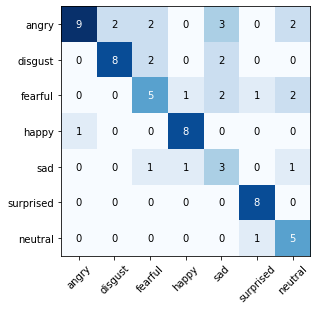

In [15]:
Emotion=7#这个数值是具体的分类数，大家可以自行修改
labels = ['angry', 'disgust', 'fearful', 'happy', 'sad','surprised','neutral']#每种类别的标签

# 显示数据
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

# 在图中标注数量/概率信息
thresh = conf_matrix.max() / 2	#数值颜色阈值，如果数值超过这个，就颜色加深。
for x in range(Emotion_kinds):
    for y in range(Emotion_kinds):
        # 注意这里的matrix[y, x]不是matrix[x, y]
        info = int(conf_matrix[y, x])
        plt.text(x, y, info,
                 verticalalignment='center',
                 horizontalalignment='center',
                 color="white" if info > thresh else "black")
                 
plt.tight_layout()#保证图不重叠
plt.yticks(range(Emotion_kinds), labels)
plt.xticks(range(Emotion_kinds), labels,rotation=45)#X轴字体倾斜45°
plt.show()
plt.close()


angry>suprised>neutral

(48, 48)
tensor(1)
(48, 48)


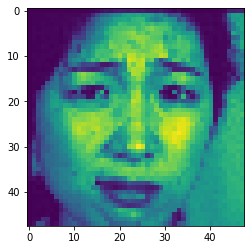

In [52]:
sample_number = 3
label = train_dataset.__getitem__(sample_number)[1]
print(label)
imgg = train_dataset.__getitem__(sample_number)[0]
imgnumpy = imgg.numpy()
imgt = imgnumpy.squeeze()
plt.imshow(imgt)
plt.show()




In [53]:
imgg.shape

torch.Size([1, 48, 48])

In [54]:
train_dataset.data[3][0]

'KA.DI2.43.tiff'

Deep_Emotion(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=810, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=7, bias=True)
  (localization): Sequential(
    (0): Conv2d(1, 8, kernel_size=(7, 7), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 10, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplac